# Heatmap

Online school example
We need analysis of count commits per studets and days/hours


## 0. Импорты

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import (colors,
                        cm)
from matplotlib.colors import (ListedColormap, 
                               LinearSegmentedColormap)
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings('ignore')

## 1. Подготовка датасета

In [4]:
# dataset extract
df=pd.read_csv('data/dataset.csv')
df.head(2)

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4


In [5]:
df[["timestamp"]] = df[["timestamp"]].astype('datetime64[ns]')

### 1.1. Dataset preparation for heatmap commits per students and per days

In [6]:
# pivot for futher sort
df_4sort=pd.pivot_table(df, index=['uid'], columns='status', values='timestamp', aggfunc='count') 

In [7]:
df_4sort=df_4sort.reset_index() 

In [8]:
df_4sort=df_4sort.sort_values(by='ready', ascending=False)

In [9]:
df_4days=df
df_4days["dayofweek"] = df_4days["timestamp"].dt.dayofweek

In [10]:
df_pv_dow=pd.pivot_table(df_4days, index=['dayofweek'], columns='uid', values='timestamp', aggfunc='count') 

In [11]:
df_pv_dow=df_pv_dow.reset_index() кс

In [12]:
df_pv_dowT=df_pv_dow.set_index('dayofweek').T 

In [13]:
df_pv_dowT=df_pv_dowT.reset_index() 

In [14]:
df_4dow=df_4sort.merge(df_pv_dowT, left_on='uid', right_on='uid', how='left')

In [15]:
df_4dow=df_4dow.drop(['ready'], axis=1) 

In [16]:
df_4dow=df_4dow.set_index('uid').T 

In [17]:
df_4dows=df_4dow.fillna(0) 

In [18]:
df_4dows

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
0,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,0.0,23.0,...,4.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
1,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,9.0,6.0,...,2.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
2,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
3,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,38.0,5.0,...,10.0,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0
4,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,3.0,2.0,...,18.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
6,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,1.0,5.0,...,0.0,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0


### 1.2.  Dataset preparation for heatmap commits per students and per hours

In [19]:
df["hour"] = df["timestamp"].dt.hour 

In [20]:

df1=pd.pivot_table(df, index=['hour'], columns='uid', values='timestamp', aggfunc='count') 

In [21]:
df1=df1.reset_index() 

In [22]:

df2=df1.set_index('hour').T 

In [23]:
df2=df2.reset_index() 

In [24]:

df_4hours=df_4sort.merge(df2, left_on='uid', right_on='uid', how='left') 

In [25]:

df_4hours=df_4hours.drop(['ready'], axis=1) 

In [26]:
df_final_hours=df_4hours.set_index('uid').T 

In [27]:
df_final_hours=df_final_hours.fillna(0) 

In [28]:
df_final_hours=df_final_hours.reset_index() 

In [29]:
df_final_hours.shape 

(22, 31)

In [30]:
df_final_hours.T.head(1) 
# in 2nd and 4th actually no commits

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
uid,,,,,,,,,,,,,,,,,,,,,
index,0.0,1.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0


In [31]:

df_final_hours.loc[len(df_final_hours.index)] = [2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

In [32]:

df_final_hours.loc[len(df_final_hours.index)] = [4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

In [33]:

df_final_hours=df_final_hours.set_index('index') 

In [34]:
df_final_hours=df_final_hours.sort_index()
df_final_hours.head(3)

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_final_hours.shape # check for completeness

(24, 30)

## 2. Heatmaps

### 2.1. Heatmap commits per students and per days

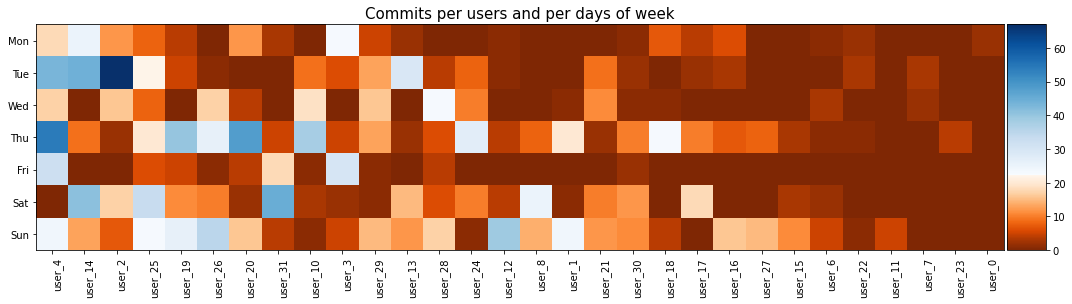

In [36]:
# color map
top = cm.get_cmap('Oranges_r', 256)
bottom = cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 256))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

# graph
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(df_4dows, cmap=plt.get_cmap(newcmp))

# title
ax.set_title("Commits per users and per days of week", size=15)

# titles for axises
daysofweek = df_4dows.index.values	
users = df_4dows.columns.values
ax.set_xticks(np.arange(len(users)))
ax.set_xticklabels(users)
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_yticks(np.arange(len(daysofweek)))
plt.setp(ax.get_xticklabels(),
         rotation = 90,
         ha = "right",
         rotation_mode = "anchor")

# color legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)

plt.colorbar(im, cax=cax)
 
fig.tight_layout()

### 2.2. Heatmap commits per students and per hours

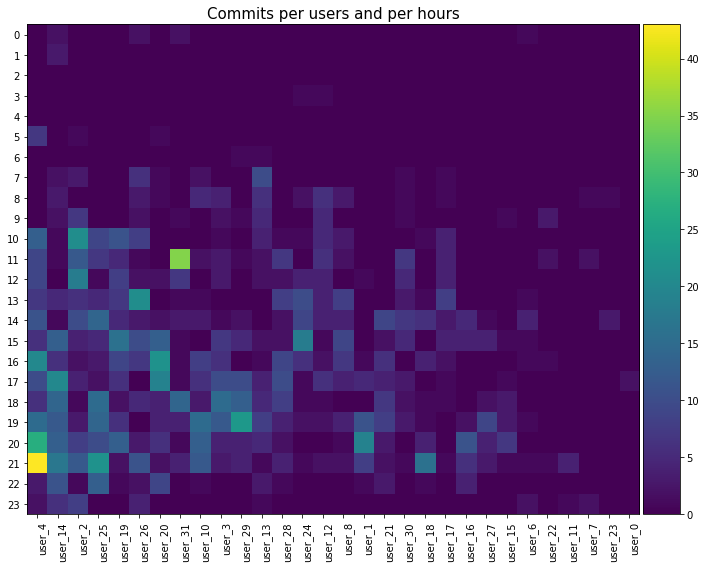

In [37]:
# graph
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(df_final_hours)

# title
ax.set_title("Commits per users and per hours", size=15)

# titles for axises
hours = df_final_hours.index.values	
users = df_final_hours.columns.values
ax.set_xticks(np.arange(len(users)))
ax.set_xticklabels(users)
ax.set_yticklabels(hours)
ax.set_yticks(np.arange(len(hours)))
plt.setp(ax.get_xticklabels(),
         rotation = 90,
         ha = "right",
         rotation_mode = "anchor")

# color legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.05)
plt.colorbar(im, cax=cax)

fig.tight_layout()


## 3. Conclusion

We see:
- students don't like to do many commits per fridays,
- thursday is most productive day,
- students don't like to do commits after midnight,
- the nmost popular range for commits is from 10 till 22 hours.

The biggest amount of commits in one day was done by user_2 (in tuesdays).
The biggest amount of commits in one hour was done by user_4 (in 21 hour).
